# Kayla Hoffman
COSI 143 - Programming Assignment 0


Manhattan data set

Part 1 - Loading and Cleaning the data

In [1]:
#load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#load the data into a data frame and print the first few entries
df = pd.read_csv('rollingsales_manhattan.csv')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",5/20/13
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",5/16/13
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",5/23/13
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",5/15/13
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",5/13/13


In [3]:
#display the data types for the attributes
#see that SALE PRICE and LAND/GROSS SQUARE FEET are object rather than numeric
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APART\nMENT\nNUMBER               object
ZIP CODE                           int64
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                   int64
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [4]:
#convert these attributes from object type to numeric
df['SALE PRICE'] = df['SALE PRICE'].str.replace('$','').str.replace(',','')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])

df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].str.replace(',','')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'])

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].str.replace(',','')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'])

#SAlE PRICE and LAND/GROSS SQUARE FEET have all been converted into numeric types
df.dtypes

<ipython-input-4-73c72dcfc43c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['SALE PRICE'] = df['SALE PRICE'].str.replace('$','').str.replace(',','')


BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APART\nMENT\nNUMBER               object
ZIP CODE                           int64
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                   int64
TOTAL UNITS                       object
LAND SQUARE FEET                   int64
GROSS SQUARE FEET                  int64
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                         int64
SALE DATE                         object
dtype: object

Part 2 - Exploring the Data set

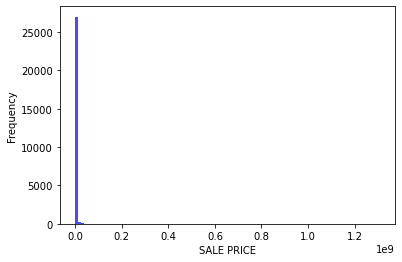

In [5]:
#print histogram with sale price as y-axis
#cleary not a very useful graph with a lot of sale prices concentrated near 0
num_bins = 100
plt.hist(df['SALE PRICE'], num_bins,facecolor='blue', alpha=0.7)
plt.xlabel('SALE PRICE') # label x-axis
plt.ylabel('Frequency') # label y-axis
plt.show()

In [6]:
#drops the rows with a sale price of 0
df.drop(df.loc[df['SALE PRICE']==0].index, inplace=True)
#the minimum sale price is now $1
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,19802.0,19802.000000,19802.000000,19802.000000,19802.000000,19802.000000,19802.000000,19802.000000,19802.000000,1.980200e+04
mean,1.0,1115.458641,667.176043,10028.759166,0.295829,901.083123,9215.194728,1605.533431,2.349409,2.556609e+06
std,0.0,485.021874,823.714846,79.665804,2.241280,3758.432613,35397.682490,746.599975,0.790052,1.916295e+07
min,1.0,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00
25%,1.0,862.000000,30.000000,10016.000000,0.000000,0.000000,0.000000,1907.000000,2.000000,3.676662e+05
50%,1.0,1113.000000,81.000000,10021.000000,0.000000,0.000000,0.000000,1930.000000,2.000000,7.400000e+05
75%,1.0,1428.000000,1200.000000,10027.000000,0.000000,0.000000,0.000000,1969.000000,2.000000,1.627399e+06
max,1.0,2250.000000,9103.000000,10463.000000,150.000000,213650.000000,940000.000000,2013.000000,4.000000,1.307965e+09


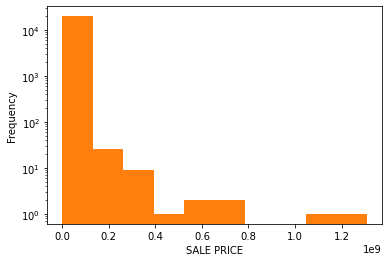

In [7]:
#histrogram of SALE PRICE with log scale and no 0 values
#more useful look at the data, but it is still right skewed
num_bins = 100
plt.hist(df['SALE PRICE'], num_bins,facecolor='blue', alpha=0.7)
plt.hist(df['SALE PRICE'], log=True)
plt.xlabel('SALE PRICE') # label x-axis
plt.ylabel('Frequency') # label y-axis
plt.show()

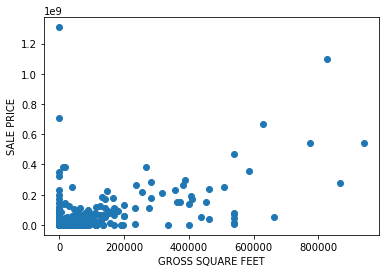

In [8]:
#Scatterplot to demonstrate relationship between sale price (y) and gross square feet(x)
#there may be a small correlation between square feet and price
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE']) # generate scatterplot
plt.xlabel('GROSS SQUARE FEET') # label x-axis
plt.ylabel('SALE PRICE') # label y-axis
plt.show() # print plot

In [9]:
#Search for only the family homes within the Building Class Category to generate a subset
familyhomes = df.loc[df['BUILDING CLASS CATEGORY'].str.contains("FAMILY HOMES")]
familyhomes.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,66,,C0,243 EAST 7TH STREET,,...,3,0,3,2381,3084,1899,1,C0,3150000,3/6/13
184,1,CHELSEA,01 ONE FAMILY HOMES,1,738,61,,A4,338 WEST 15 STREET,,...,1,0,1,1528,2736,1900,1,A4,5400000,7/25/13
186,1,CHELSEA,01 ONE FAMILY HOMES,1,743,27,,A9,323 WEST 19TH STREET,,...,1,0,1,1894,3564,1901,1,A9,7180000,4/16/13
190,1,CHELSEA,01 ONE FAMILY HOMES,1,770,21,,A9,233 WEST 20TH,,...,1,0,1,1064,1260,1901,1,A9,7935000,6/27/13
194,1,CHELSEA,01 ONE FAMILY HOMES,1,774,81,,A4,280 WEST 25TH STREET,,...,1,0,1,937,3307,1900,1,A4,4000000,5/30/13


Manually searched the excel sheet and found that there are no family homes that are not either 1, 2, or 3 families, so the subset familyhomes is accurate for the scatterplot.


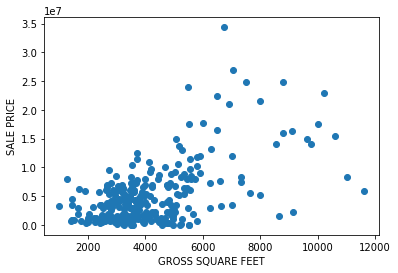

In [13]:
#This scatterplot shows the relationship between gross square feet and price for 1, 2, and 3 family homes for the data set
plt.scatter(familyhomes['GROSS SQUARE FEET'], familyhomes['SALE PRICE'])
plt.xlabel('GROSS SQUARE FEET') # label x-axis
plt.ylabel('SALE PRICE') # label y-axis
plt.show() # print plot

* Part 3: The exploratory data analysis for the other two data sets are in separate files within this folder.
    For the second two data sets, I selected Brooklyn and Queens. After performing the same exploratory data analysis as featured above, I have noticed the following things:
* For the first histogram of Sale Price, with all the zero values included, the Manhattan data set had the largest range on the x-axis and the largest range on the y-axis. All three sets have a large amount of data concentrated around zero, so most of the sales prices were very small.
* After removing all zero sale prices and using log scale, the new histograms show that Brooklyn had a larger range of prices than Queens did and more expensive properties. Queen's sale prices were the most concentrated in a few bars of the histogram. Manhattan had the highest sales prices of the three boroughs by a magnitude of 10 since it had a graph scale of le9 rather than le8.
* All three boroughs may have some outliers in the gross square feet and sale price scatterplot. Manhattan has the highest absolute sale price, while Brooklyn had the largest gross square feet data point. Brooklyn and Queens are more tightly clustered around the origin, but Manhattan has more variation in both square footage and price.
* There may be a couple outliers for each borough on the family home scatterplot. The one, two, or three family home graphs show that Queens had lower sale prices than both Manhattan and Brooklyn. Queens also had a majority of the homes between zero and 7,500 gross square feet with a wide range of prices. Brooklyn may have some outliers based on the square footage, but the majority of the homes are between 0 and 8,000 gross square feet and a comparatively narrow range of prices. Manhattan has a wider range of square feet with a possible correlation between square footage and the sale price.
